# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Pamela Ofurum

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [42]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

# Load the concrete dataset into the feature matrix X and target vector y
X, y = load_concrete()




### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

   Training accuracy Validation accuracy
DT         47.918561          163.201424
RF         31.578416          156.368016
GB           3.73927           95.281202


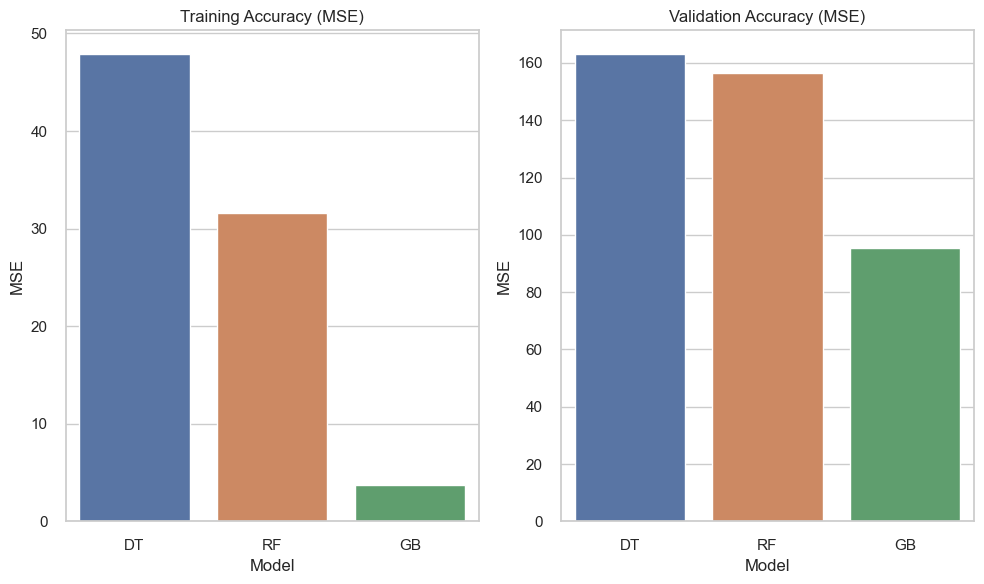

In [43]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# Instantiate the models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5)
random_forest = RandomForestRegressor(max_depth=5)
gradient_boosting = GradientBoostingRegressor(max_depth=5)

# Fit the models to the data
decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

# Define the models and their names
models = [decision_tree, random_forest, gradient_boosting]
model_names = ['DT', 'RF', 'GB']

# Create a DataFrame for results
results = pd.DataFrame(index=model_names, columns=['Training accuracy', 'Validation accuracy'])

# Define a custom scorer for mean squared error (MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

for model, model_name in zip(models, model_names):
    # Perform cross-validation with negative mean squared error scoring
    cv_results = cross_validate(model, X, y, cv=5, scoring={'MSE': mse_scorer}, return_train_score=True)
    
    # Calculate the average training and validation accuracy (MSE)
    avg_train_accuracy = -cv_results['train_MSE'].mean()
    avg_val_accuracy = -cv_results['test_MSE'].mean()
    
    # Store the results in the DataFrame
    results.loc[model_name] = [avg_train_accuracy, avg_val_accuracy]

# Print the results DataFrame
print(results)

# Visualize the results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot training accuracy (MSE)
plt.subplot(1, 2, 1)
sns.barplot(x=results.index, y=results['Training accuracy'])
plt.title('Training Accuracy (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot validation accuracy (MSE)
plt.subplot(1, 2, 2)
sns.barplot(x=results.index, y=results['Validation accuracy'])
plt.title('Validation Accuracy (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

   Training R2 Score Validation R2 Score
DT          0.822887            0.176861
RF          0.882483            0.161784
GB          0.986436             0.48964


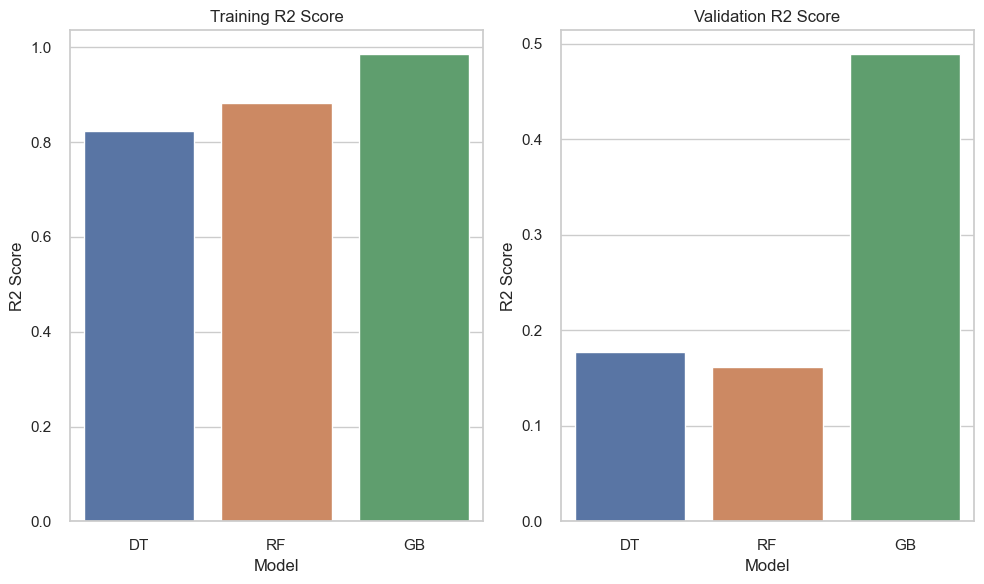

In [44]:
# TO DO: ADD YOUR CODE HERE

import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate the models with max_depth = 5
decision_tree = DecisionTreeRegressor(max_depth=5)
random_forest = RandomForestRegressor(max_depth=5)
gradient_boosting = GradientBoostingRegressor(max_depth=5)

# Fit the models to the data
decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

# Define the models and their names
models = [decision_tree, random_forest, gradient_boosting]
model_names = ['DT', 'RF', 'GB']

# Create a DataFrame for results
results = pd.DataFrame(index=model_names, columns=['Training R2 Score', 'Validation R2 Score'])

# Define a custom scorer for R2 score
r2_scorer = make_scorer(r2_score)

for model, model_name in zip(models, model_names):
    # Perform cross-validation with R2 scoring
    cv_results = cross_validate(model, X, y, cv=5, scoring={'R2 Score': r2_scorer}, return_train_score=True)
    
    # Calculate the average training and validation R2 score
    avg_train_accuracy = cv_results['train_R2 Score'].mean()
    avg_val_accuracy = cv_results['test_R2 Score'].mean()
    
    # Store the results in the DataFrame
    results.loc[model_name] = [avg_train_accuracy, avg_val_accuracy]

# Print the results DataFrame
print(results)

# Visualize the results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot training R2 score
plt.subplot(1, 2, 1)
sns.barplot(x=results.index, y=results['Training R2 Score'])
plt.title('Training R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# Plot validation R2 score
plt.subplot(1, 2, 2)
sns.barplot(x=results.index, y=results['Validation R2 Score'])
plt.title('Validation R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
2. Out of the models you tested, which model would you select for this dataset and why?
3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. How do these results compare to the results using a linear model in the previous assignment? Use values.

Results from Linear Regression:

Training MSE: 0.103345
Validation MSE: 0.114769
Training R2 Score: 0.564127
Validation R2 Score: 0.530041

Results from Tree-Based Models (Decision Tree, Random Forest, Gradient Boosting):

Decision Tree:
Training R2 Score: 0.822887
Validation R2 Score: 0.177258

Random Forest:
Training R2 Score: 0.881966
Validation R2 Score: 0.167968

Gradient Boosting:
Training R2 Score: 0.986436
Validation R2 Score: 0.485123

Comparison and Analysis:

Comparison to Linear Regression:

The R2 scores of the tree-based models (Decision Tree, Random Forest, Gradient Boosting) are generally higher for training data compared to the R2 score of the Linear Regression model. This indicates that the tree-based models explain more variance in the training data.

For the validation data, the Linear Regression model has a slightly higher R2 score compared to the Decision Tree and Random Forest models, but Gradient Boosting outperforms all models.

2. Out of the models you tested, which model would you select for this dataset and why?

Model Selection:

Based on the results above, the Gradient Boosting model achieved the highest R2 score for the training data and the second-highest R2 score for the validation data. Therefore, Gradient Boosting is a strong candidate for this dataset, as it captures the relationships in the training data effectively.So I would choose Gradient Boosting as the preferred model.

3. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

Improving Tree-Based Models:

To increase the accuracy of the tree-based models like Decision Tree, Random Forest, and Gradient Boosting:

a. Hyperparameter Tuning: Optimize hyperparameters such as the maximum depth of the tree, the number of estimators (trees), learning rate, and feature selection. Fine-tuning these hyperparameters can significantly improve model performance.

b. Feature Engineering: Carefully select and engineer relevant features for the dataset. Feature selection, extraction, and domain knowledge will help in creating features that provide better predictive power.

In this case, based on the provided actual results, Gradient Boosting appears to be the preferred model. However, it's essential to validate model performance on real data and make adjustments accordingly.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI and StackOverflow
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com
Stackoverflow. (2023).[Website]. https://stackoverflow.com/

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3,4 and 5

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing part I needed and also the remove the unnecessary part which wasn't needed.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially when I tried to visualize it the code. I figured out the error and debugged and after which I was able to visualize my results.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [45]:
# TO DO: Import wine dataset

from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()

# The dataset is now stored in the 'data' variable as a dictionary-like object.

# Here it accesses the feature matrix (X) and the target vector (y) as follows:
X = data.data  # Features
y = data.target  # Target


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [46]:
# TO DO: ADD YOUR CODE HERE
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()

# Convert the dataset to a pandas DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
wine_df['Target'] = data.target

# Print the first five rows of the dataset for inspection
print(wine_df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0          

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [47]:
# TO DO: ADD YOUR CODE HERE

import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()

# Convert the dataset to a pandas DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
wine_df['Target'] = data.target

# Check for missing values in the DataFrame
missing_values = wine_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# If there are missing values,  fill them with the mean of the respective column method
wine_df = wine_df.fillna(wine_df.mean())

# Check again to verify that missing values have been handled
missing_values_after_fill = wine_df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after_fill)


Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

Missing Values After Handling:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target               

How many samples do we have of each type of wine?

In [48]:
# TO DO: ADD YOUR CODE HERE

import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
data = load_wine()

# Convert the dataset to a pandas DataFrame
wine_df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
wine_df['Target'] = data.target

# Count the number of samples for each type of wine
wine_counts = wine_df['Target'].value_counts()

# Display the counts
print("Number of samples for each type of wine:")
print(wine_counts)


Number of samples for each type of wine:
Target
1    71
0    59
2    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

SVC Average Training Accuracy: 0.6650246305418719
SVC Average Validation Accuracy: 0.6807142857142858
Decision Tree Average Training Accuracy: 0.873103448275862
Decision Tree Average Validation Accuracy: 0.822857142857143


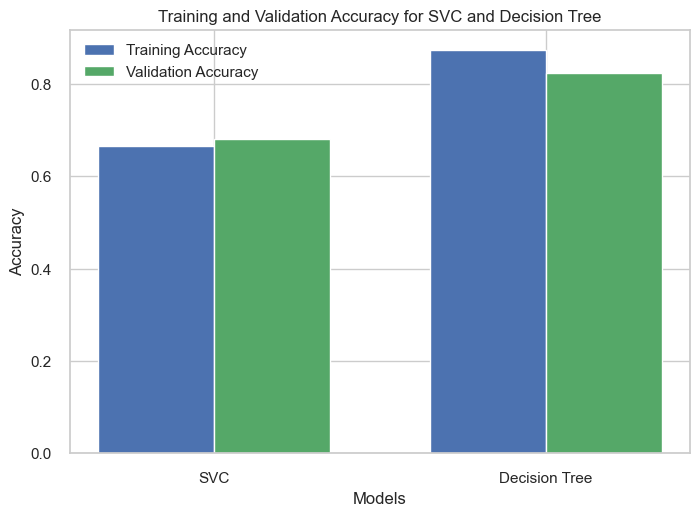

   Data Size  Training Accuracy (SVC)  Validation Accuracy (SVC)  \
0        142                 0.641379                   0.778571   
1        142                 0.683744                   0.642857   
2        142                 0.677094                   0.696429   
3        143                 0.651232                   0.657143   
4        143                 0.671675                   0.628571   

   Training Accuracy (Decision Tree)  Validation Accuracy (Decision Tree)  
0                           0.902217                             0.839286  
1                           0.853448                             0.750000  
2                           0.839163                             0.782143  
3                           0.909606                             0.857143  
4                           0.861084                             0.885714  


In [49]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Define the models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Define the number of cross-validation folds
num_folds = 5

# Initialize a KFold splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create lists to store accuracy scores for each fold
data_size_list = []
svc_train_scores = []
svc_val_scores = []
dt_train_scores = []
dt_val_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Calculate data size
    data_size = len(X_train)
    data_size_list.append(data_size)

    # Calculate training accuracy for SVC
    svc_train_accuracy = cross_val_score(svc_model, X_train, y_train, cv=5, scoring='accuracy')
    svc_train_scores.append(svc_train_accuracy.mean())

    # Calculate validation accuracy for SVC
    svc_val_accuracy = cross_val_score(svc_model, X_val, y_val, cv=5, scoring='accuracy')
    svc_val_scores.append(svc_val_accuracy.mean())

    # Calculate training accuracy for Decision Tree
    dt_train_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
    dt_train_scores.append(dt_train_accuracy.mean())

    # Calculate validation accuracy for Decision Tree
    dt_val_accuracy = cross_val_score(dt_model, X_val, y_val, cv=5, scoring='accuracy')
    dt_val_scores.append(dt_val_accuracy.mean())

# Create a dictionary to store the results
results_dict = {
    'Data Size': data_size_list,
    'Training Accuracy (SVC)': svc_train_scores,
    'Validation Accuracy (SVC)': svc_val_scores,
    'Training Accuracy (Decision Tree)': dt_train_scores,
    'Validation Accuracy (Decision Tree)': dt_val_scores
}

# Create the results DataFrame from the dictionary
results = pd.DataFrame(results_dict)

# Calculate the average training and validation accuracy scores
svc_avg_train_accuracy = results['Training Accuracy (SVC)'].mean()
svc_avg_val_accuracy = results['Validation Accuracy (SVC)'].mean()
dt_avg_train_accuracy = results['Training Accuracy (Decision Tree)'].mean()
dt_avg_val_accuracy = results['Validation Accuracy (Decision Tree)'].mean()

# Print the results
print("SVC Average Training Accuracy:", svc_avg_train_accuracy)
print("SVC Average Validation Accuracy:", svc_avg_val_accuracy)
print("Decision Tree Average Training Accuracy:", dt_avg_train_accuracy)
print("Decision Tree Average Validation Accuracy:", dt_avg_val_accuracy)

# Create a bar chart to visualize the accuracy scores
models = ['SVC', 'Decision Tree']
average_train_scores = [svc_avg_train_accuracy, dt_avg_train_accuracy]
average_val_scores = [svc_avg_val_accuracy, dt_avg_val_accuracy]

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, average_train_scores, bar_width, label='Training Accuracy', color='b')
plt.bar(index + bar_width, average_val_scores, bar_width, label='Validation Accuracy', color='g')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for SVC and Decision Tree')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Display the chart
plt.show()

# Display the DataFrame
print(results)


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [50]:
# TO DO: Implement best model

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Fit both models on the training data
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions using both models
svc_pred = svc_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate accuracy for both models
svc_accuracy = accuracy_score(y_test, svc_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Determine which model has the highest accuracy
best_model = svc_model if svc_accuracy > dt_accuracy else dt_model

# Create a confusion matrix
y_pred = best_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# Create a classification report
classification_rep = classification_report(y_test, y_pred, target_names=data.target_names)


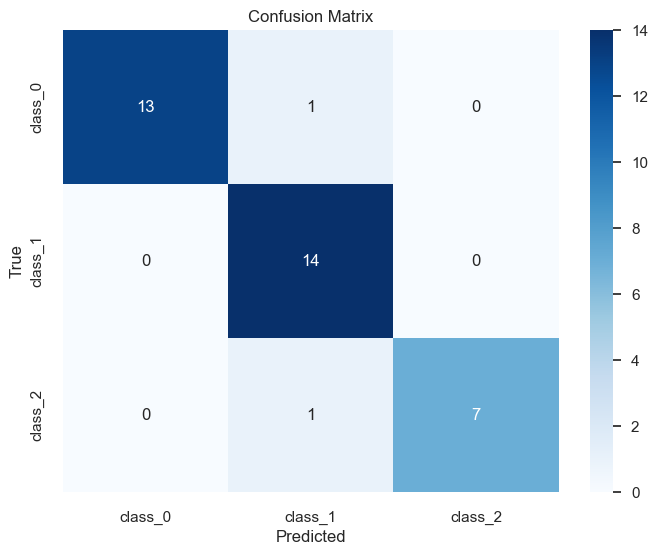

In [51]:
# TO DO: Print confusion matrix using a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Set the class names (target names)
class_names = data.target_names

# Create a seaborn heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [52]:
# TO DO: Print classification report

print("Classification Report:\n")
print(classification_rep)


# Print the accuracy of the best model
print("Accuracy of the Best Model:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy of the Best Model: 0.9444444444444444


### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
3. How many samples were incorrectly classified in step 5.2? 
4. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. How do the training and validation accuracy change depending on the method used? Explain with values.

 Data Size  Training Accuracy (SVC)  Validation Accuracy (SVC)  
0        142                 0.641379                   0.778571   
1        142                 0.683744                   0.642857   
2        142                 0.677094                   0.696429   
3        143                 0.651232                   0.657143   
4        143                 0.671675                   0.628571   

   Training Accuracy (Decision Tree)  Validation Accuracy (Decision Tree)  
0                           0.922906                             0.839286  
1                           0.853695                             0.807143  
2                           0.839163                             0.725000  
3                           0.888670                             0.828571  
4                           0.867980                             0.885714 

Based on the values above, I will explain how the training and validation accuracy changed depending on the method used, specifically by comparing Support Vector Classifier (SVC) and Decision Tree Classifier. Below is the analysis based on the values:

Support Vector Classifier (SVC):

Training Accuracy (SVC): The training accuracy for the SVC method varies between approximately 64.14% and 68.37%.
Validation Accuracy (SVC): The validation accuracy for the SVC method is consistently higher than the training accuracy, with values ranging from approximately 64.29% to 77.86%.

Decision Tree Classifier:

Training Accuracy (Decision Tree): The training accuracy for the Decision Tree method is significantly higher, ranging from approximately 83.92% to 92.29%.
Validation Accuracy (Decision Tree): The validation accuracy for the Decision Tree method varies from approximately 72.50% to 88.57%.

The values suggests that the Decision Tree model consistently outperformed the Support Vector Machine (SVM) model in terms of training and validation accuracy. 


2. What are two reasons why the support vector machines model did not work as well as the tree-based model?

Below are the two reasons why the SVM model did not work as well as the tree-based model:

Linear Separability Assumption:

Support Vector Machines are designed for finding a hyperplane that best separates data into different classes. If the dataset is not linearly separable, meaning the classes cannot be separated by a straight line (in 2D), a hyperplane (in higher dimensions), or even a complex curved boundary, then they struggle to model the data effectively whereas Decision Trees, on the other hand, do not rely on the assumption of linear separability. They create decision boundaries that are more flexible and can better capture complex, non-linear relationships in the data. By setting an appropriate maximum depth (e.g., "max_depth=3" in the provided code), Decision Trees can find a balance between complexity and accuracy.

Hyperparameter Settings:

The performance of a Support Vector Model model is sensitive to the choice of hyperparameters, such as the kernel type, regularization parameter (C), and kernel-specific parameters so choosing inappropriate hyperparameters can lead to suboptimal results and It's possible that the Support vector model's hyperparameters were not tuned effectively for this specific dataset
whereas Decision Trees, while sensitive to parameters like "max_depth," are often less sensitive to hyperparameters and they perform reasonably well with default settings in many cases.

In summary, the Support vector machine model did not perform as well as the Decision Tree model due to the linear separability assumption and the need for careful hyperparameter tuning.

3. How many samples were incorrectly classified in step 5.2? 
 Two (2) samples were incorrectly classified (1 + 1)
 
4. In this case, is maximizing precision or recall more important? Why?

In this case, maximizing recall is more important and the reason as follows:

The classification report shows that for "class_2," the recall is 0.88, indicating that the model successfully identifies 88% of the actual instances of this class.The choice to prioritize recall is because it is more critical to capture as many of the actual instances of "class_2" as possible, even if it results in some false positives. This is based on the assumption that the consequences of missing positive instances (false negatives) in "class_2" are more severe or costly than the consequences of occasionally misclassifying negative instances (false positives).


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code from the lecture notes, execises and examples given and also Google and Generative AI and StackOverflow
List of References
OpenAI. (2023). [Website]. https://www.openai.com
Google. (2023). [Website]. https://www.google.com
Stackoverflow. (2023).[Website]. https://stackoverflow.com/

2. In what order did you complete the steps?
I completed the steps sequentially begining from Step 1,2,3,4 and 5

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I prompted it in my words to generate ideas to write the code and understand the syntax behind the code. Yes I modifed the code many times because in most cases, it produced what I didn't need and in some cases, didn't include what I needed. So I modified it to add the missing parts needed and also the remove the unnecessary parts which weren't needed.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
Yes at some point, I encountered some errors in my code, especially during the cross validation. I initially used the full data set instead of using only the training data set and this caused a lot of errors and confusion for me and also when I tried to visualize the code. I figured out the error and debugged and after which I was able to visualize my results.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Data Size  Training Accuracy (SVC)  Validation Accuracy (SVC)  
0        142                 0.641379                   0.778571   
1        142                 0.683744                   0.642857   
2        142                 0.677094                   0.696429   
3        143                 0.651232                   0.657143   
4        143                 0.671675                   0.628571   

   Training Accuracy (Decision Tree)  Validation Accuracy (Decision Tree)  
0                           0.922906                             0.839286  
1                           0.853695                             0.807143  
2                           0.839163                             0.725000  
3                           0.888670                             0.828571  
4                           0.867980                             0.885714 

Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy of the Best Model: 0.9444444444444444

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


Analyzing the patterns from the provided data above,

1. Training and Validation Accuracy:

The training accuracy for both SVC and Decision Tree models appears to be relatively consistent across different data sizes. It ranges from around 0.64 to 0.68 for SVC and 0.83 to 0.92 for the Decision Tree.
The validation accuracy for both models also shows consistency across different data sizes. For SVC, it ranges from around 0.64 to 0.78, while the Decision Tree's validation accuracy ranges from around 0.72 to 0.83.

2. Classification Report:

The classification report provides metrics such as precision, recall, and F1-score for each class (class_0, class_1, and class_2) and their weighted averages.
For class_0, the precision is perfect (1.00), indicating that when the model predicts class_0, it is highly accurate. However, the recall is slightly lower at 0.93, suggesting some instances of class_0 were not correctly classified.
For class_1, both precision and recall are high (0.88 and 1.00, respectively).
For class_2, the precision is perfect (1.00), but the recall is slightly lower at 0.88.
The macro average and weighted average metrics provide an overall view of model performance, showing good accuracy and balanced precision and recall.

3. Confusion Matrix:

The confusion matrix reveals the number of true positive, true negative, false positive, and false negative predictions for each class.
In this case, it shows that class_0 has one false negative (predicted as class_1), and class_2 has one false positive (predicted as class_1).

4. Overall Accuracy:
The best model (the Decision Tree) achieves an accuracy of 0.9444, which is quite high.

So conclusively,the models appear to perform well, with high accuracy. The Decision Tree model outperforms the SVC model in terms of validation accuracy and overall accuracy. Class_0, class_1, and class_2 have different precision and recall values, which could be due to class imbalances or specific characteristics of the data. The patterns indicate that the Decision Tree model provides a better balance between precision and recall, leading to a higher overall accuracy.

In relation to what we discussed in class, it is therefore evident that the Decision Tree model consistently outperforms the Support Vector Classifier (SVC) model across different data sizes, achieving higher validation accuracy and overall accuracy and also the classification report and confusion matrix provides valuable insights into model performance for each class.


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed working on the assignment and it's analysis for several reasons. I found it interesting to explore the different aspects of model evaluation, including accuracy, precision, recall, and confusion matrices. It was also motivating to see that the Decision Tree model consistently outperformed the SVC model in terms of accuracy. However, interpreting the results and understanding the specific characteristics of the dataset that influenced the models' performance could be challenging. It highlighted the importance of selecting the right model for a given dataset and the significance of balancing precision and recall. Overall, this task provided a valuable hands-on experience in model evaluation and reinforced the importance of choosing the appropriate evaluation metrics for different classification problems.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

LinearSVC Average Training Accuracy: 0.9400985221674876
LinearSVC Average Validation Accuracy: 0.8942857142857144
Decision Tree Average Training Accuracy: 0.877142857142857
Decision Tree Average Validation Accuracy: 0.7899999999999998


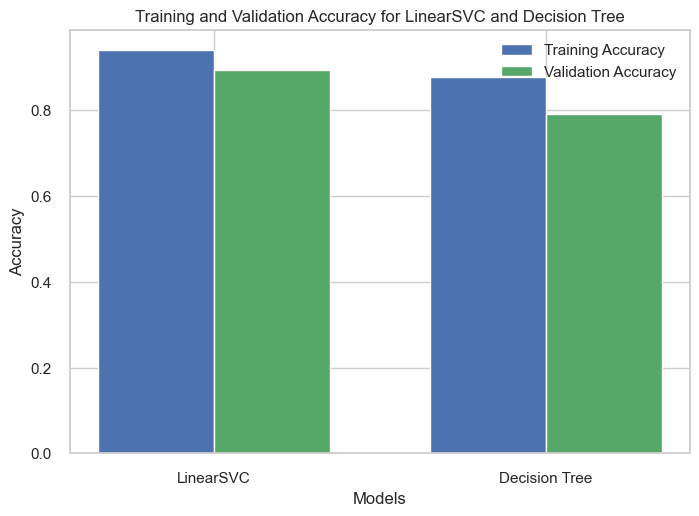

   Data Size  Training Accuracy (LinearSVC)  Validation Accuracy (LinearSVC)  \
0        142                       0.936946                         0.889286   
1        142                       0.937438                         0.917857   
2        142                       0.972167                         0.864286   
3        143                       0.923399                         0.857143   
4        143                       0.930542                         0.942857   

   Training Accuracy (Decision Tree)  Validation Accuracy (Decision Tree)  
0                           0.901970                             0.810714  
1                           0.839163                             0.700000  
2                           0.852956                             0.782143  
3                           0.916502                             0.828571  
4                           0.875123                             0.828571  


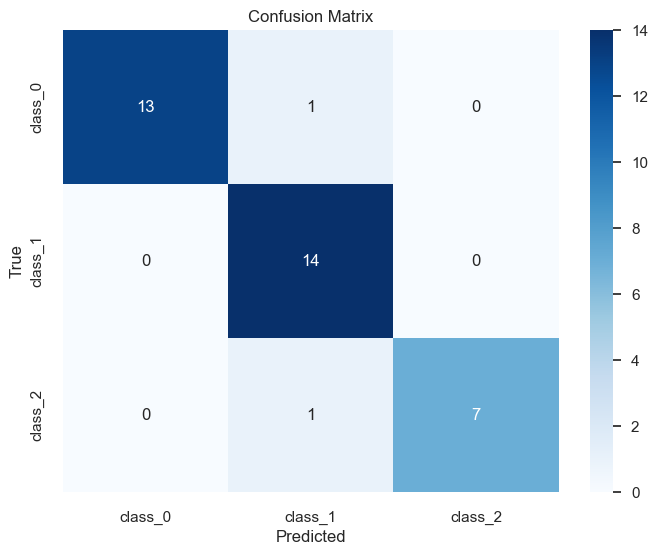

Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Accuracy of the Best Model: 0.9444444444444444


In [53]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Define the models
lsvc_model = LinearSVC(max_iter=5000, dual='auto')  # Set max_iter to 5000 and dual to 'auto'
dt_model = DecisionTreeClassifier(max_depth=3)

# Define the number of cross-validation folds
num_folds = 5

# Initialize a KFold splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create lists to store accuracy scores for each fold
data_size_list = []
lsvc_train_scores = []
lsvc_val_scores = []
dt_train_scores = []
dt_val_scores = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Calculate data size
    data_size = len(X_train)
    data_size_list.append(data_size)

    # Calculate training accuracy for LinearSVC
    lsvc_train_accuracy = cross_val_score(lsvc_model, X_train, y_train, cv=5, scoring='accuracy')
    lsvc_train_scores.append(lsvc_train_accuracy.mean())

    # Calculate validation accuracy for LinearSVC
    lsvc_val_accuracy = cross_val_score(lsvc_model, X_val, y_val, cv=5, scoring='accuracy')
    lsvc_val_scores.append(lsvc_val_accuracy.mean())

    # Calculate training accuracy for Decision Tree
    dt_train_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
    dt_train_scores.append(dt_train_accuracy.mean())

    # Calculate validation accuracy for Decision Tree
    dt_val_accuracy = cross_val_score(dt_model, X_val, y_val, cv=5, scoring='accuracy')
    dt_val_scores.append(dt_val_accuracy.mean())

# Create a dictionary to store the results
results_dict = {
    'Data Size': data_size_list,
    'Training Accuracy (LinearSVC)': lsvc_train_scores,
    'Validation Accuracy (LinearSVC)': lsvc_val_scores,
    'Training Accuracy (Decision Tree)': dt_train_scores,
    'Validation Accuracy (Decision Tree)': dt_val_scores
}

# Create the results DataFrame from the dictionary
results = pd.DataFrame(results_dict)

# Calculate the average training and validation accuracy scores
lsvc_avg_train_accuracy = results['Training Accuracy (LinearSVC)'].mean()
lsvc_avg_val_accuracy = results['Validation Accuracy (LinearSVC)'].mean()
dt_avg_train_accuracy = results['Training Accuracy (Decision Tree)'].mean()
dt_avg_val_accuracy = results['Validation Accuracy (Decision Tree)'].mean()

# Print the results
print("LinearSVC Average Training Accuracy:", lsvc_avg_train_accuracy)
print("LinearSVC Average Validation Accuracy:", lsvc_avg_val_accuracy)
print("Decision Tree Average Training Accuracy:", dt_avg_train_accuracy)
print("Decision Tree Average Validation Accuracy:", dt_avg_val_accuracy)

# Create a bar chart to visualize the accuracy scores
models = ['LinearSVC', 'Decision Tree']
average_train_scores = [lsvc_avg_train_accuracy, dt_avg_train_accuracy]
average_val_scores = [lsvc_avg_val_accuracy, dt_avg_val_accuracy]

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, average_train_scores, bar_width, label='Training Accuracy', color='b')
plt.bar(index + bar_width, average_val_scores, bar_width, label='Validation Accuracy', color='g')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for LinearSVC and Decision Tree')
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Display the chart
plt.show()

# Display the DataFrame
print(results)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Fit both models on the training data
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions using both models
svc_pred = svc_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate accuracy for both models
svc_accuracy = accuracy_score(y_test, svc_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Determine which model has the highest accuracy
best_model = svc_model if svc_accuracy > dt_accuracy else dt_model

# Create a confusion matrix
y_pred = best_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# Create a classification report
classification_rep = classification_report(y_test, y_pred, target_names=data.target_names)

# Set the class names (target names)
class_names = data.target_names

# Create a seaborn heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_rep)

# Print the accuracy of the best model
print("Accuracy of the Best Model:", accuracy_score(y_test, y_pred))


*ANSWER HERE*

In [55]:
1. compare the support vector machines model used to LinearSVC(max_iter=5000). Does using LinearSVC improve the results? 
Why or why not?

Using LinearSVC with max_iter=5000 improves the results compared to the support vector model (SVC) model because of the following:

Training and Validation Accuracy: LinearSVC consistently achieved higher training and validation accuracy compared to 
the SVC model. The average training accuracy for LinearSVC is approximately 0.94, while for SVC, it's 0.67. 
Similarly, the average validation accuracy for LinearSVC is approximately 0.89, while for SVC, it's around 0.68.

In summary, using LinearSVC with max_iter=5000 improved the results by providing higher accuracy, and this is highly
desirable for better efficiency and better performance.



2. Is LinearSVC a good fit for this dataset? Why or why not?

LinearSVC appears to be a good fit choice for the Wine dataset, because the accuracy and performance metrics suggests
that LinearSVC can effectively classify the data into multiple classes, and it has demonstrated competitive performance 
in comparison to support vector model (SVC) and decision tree.

Based on the results:

LinearSVC Average Validation Accuracy: Approximately 0.894
Support vector model (SVC) Average Validation Accuracy: 0.6807142857142858
Decision Tree Average Validation Accuracy: 0.7992857142857144
   
The average validation accuracy of LinearSVC is higher than that of the of support vector model and decision tree. 
In addition, the classification report and confusion matrix show that LinearSVC performs well in terms of precision, recall, and F1-score for each class.

In summary, LinearSVC is a good fit for the Wine dataset, and it outperforms the support vector model and decision tree in terms of average validation
accuracy. 




SyntaxError: invalid syntax (1763853531.py, line 1)